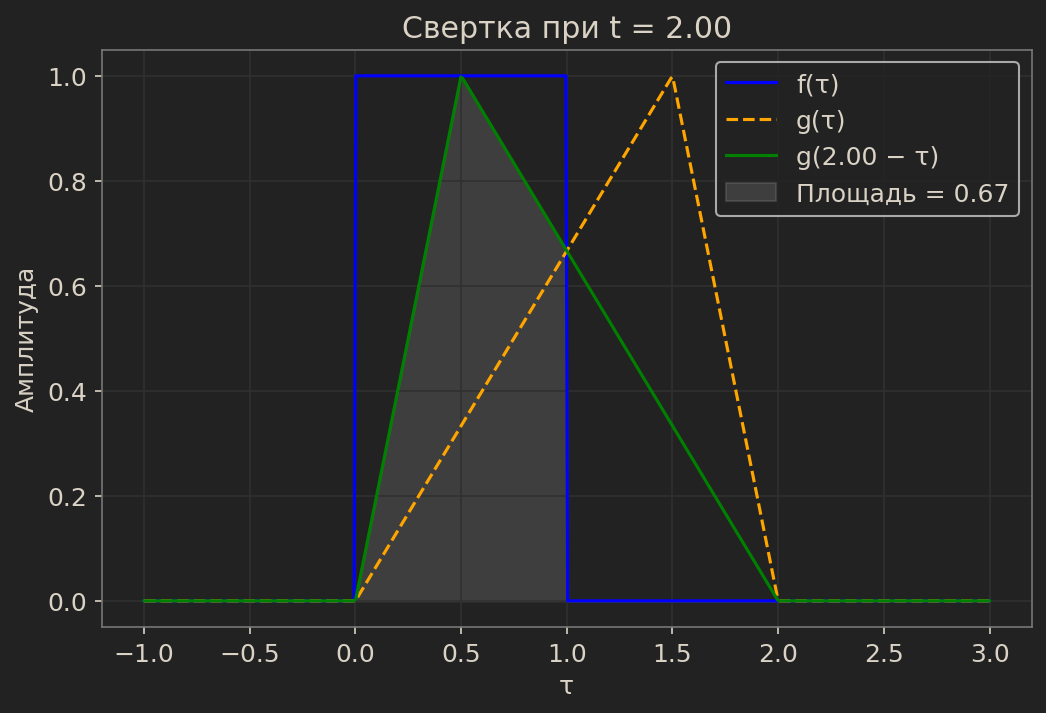

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ordevoir-dark")

def f(tau):
    """Прямоугольный импульс на [0,1]."""
    return np.where((tau >= 0) & (tau <= 1), 1, 0)

def g(tau):
    """
    Аcимметричный треугольный импульс на [0,2],
    пик в τ=1.5 (меньший угол возрастания и более крутой спад).
    """
    # rising: от 0 до 1 на отрезке [0,1.5]
    rising = (tau / 1.5)
    # falling: от 1 до 0 на отрезке [1.5,2]
    falling = (2 - tau) / 0.5
    return np.where((tau >= 0) & (tau <= 1.5), rising,
           np.where((tau > 1.5) & (tau <= 2), falling, 0))

def plot_convolution(t):
    """
    Строит на одном графике:
     - f(τ): синим пунктиром
     - g(τ): оранжевым пунктиром
     - g(t - τ): зелёным сплошным
     - Заштрихованная область = f(τ)·g(t − τ)
    """
    tau = np.linspace(-1, 3, 500)
    f_vals = f(tau)
    g_vals = g(tau)
    g_shifted = g(t - tau)
    prod = f_vals * g_shifted
    area = np.trapezoid(prod, tau)
    
    plt.figure(figsize=(8, 5))
    plt.plot(tau, f_vals, 'b', label='f(τ)')
    plt.plot(tau, g_vals, 'orange', linestyle='--', label='g(τ)')
    plt.plot(tau, g_shifted, 'g-', label=f'g({t:.2f} − τ)')
    plt.fill_between(tau, prod, color='gray', alpha=0.3, label=f'Площадь = {area:.2f}')
    
    plt.title(f'Свертка при t = {t:.2f}')
    plt.xlabel('τ')
    plt.ylabel('Амплитуда')
    plt.legend()
    plt.grid(True)
    plt.show()

# Пример: отрисовать для t = 1.5
plot_convolution(2.)

In [6]:
from ipywidgets import interact

interact(plot_convolution, t=(0.0, 4.0, 0.01))

interactive(children=(FloatSlider(value=2.0, description='t', max=4.0, step=0.01), Output()), _dom_classes=('w…

<function __main__.plot_convolution(t)>